In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [136]:
df=pd.read_csv(r"C:\Users\Itvedant CR3-08\Documents\DILIP\MLmain\ML_Files\cars.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["horsepower"].replace("?",np.nan,inplace=True)

In [7]:
df["normalized-losses"]=df["normalized-losses"].astype("float64")
df["horsepower"]=df["horsepower"].astype("float64")

In [8]:
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["normalized-losses","horsepower"]]=si.fit_transform(df[["normalized-losses","horsepower"]])

In [9]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [10]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [11]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


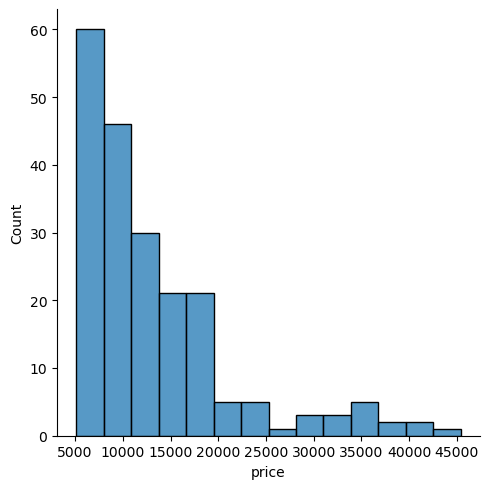

In [12]:
sns.displot(data=target)

<Axes: xlabel='price'>

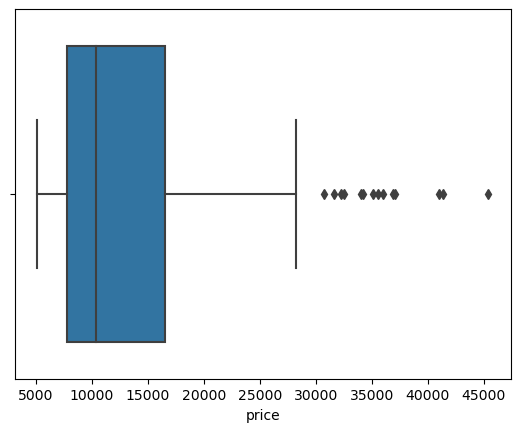

In [13]:
sns.boxplot(data=df,x=target)

In [14]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import plotly.express as px
t=px.data.tips()
fig=px.box(target)
fig.show()

In [17]:
t=px.data.tips()
fig=px.box(features,x=target,y="make")
fig.show()

<Axes: xlabel='price', ylabel='make'>

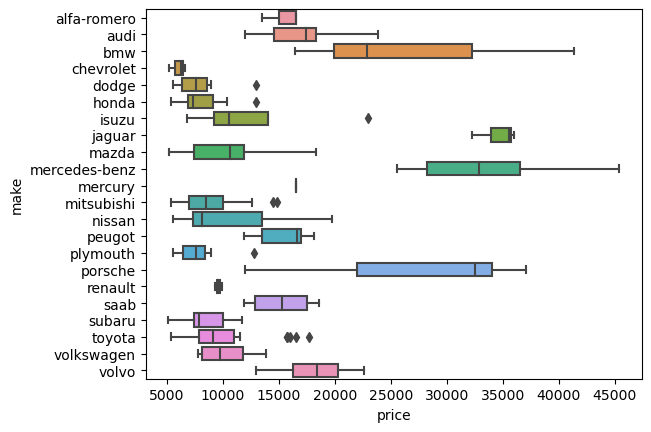

In [18]:
sns.boxplot(data=features,x=target,y="make")

In [19]:
features[(features["make"]=="dodge") & (target>8921)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24


In [20]:
features.drop(29,axis=0,inplace=True)

In [21]:
target.drop(29,axis=0,inplace=True)

In [22]:
features[(features["make"]=="dodge") & (target>8921)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg


In [23]:
features[(features["make"]=="toyota") & (target>15998)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24


In [24]:
i=features[(features["make"]=="toyota") & (target>15998)].index
features.drop(i,axis=0,inplace=True)

In [25]:
target.drop(i,axis=0,inplace=True)

In [26]:
features[(features["make"]=="toyota") & (target>15998)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg


In [27]:
features[(features["make"]=="honda") & (target>9395)]
features.drop([40,41,42],axis=0,inplace=True)
target.drop([40,41,42],axis=0,inplace=True)

In [28]:
i=features[(features["make"]=="isuzu") & (target>17000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

In [29]:
i=features[(features["make"]=="mitsubishi") & (target>11000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

In [30]:
i=features[(features["make"]=="plymouth") & (target>8921)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

In [31]:
i=features[(features["make"]=="toyota") & (target>15000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

<Axes: xlabel='price', ylabel='make'>

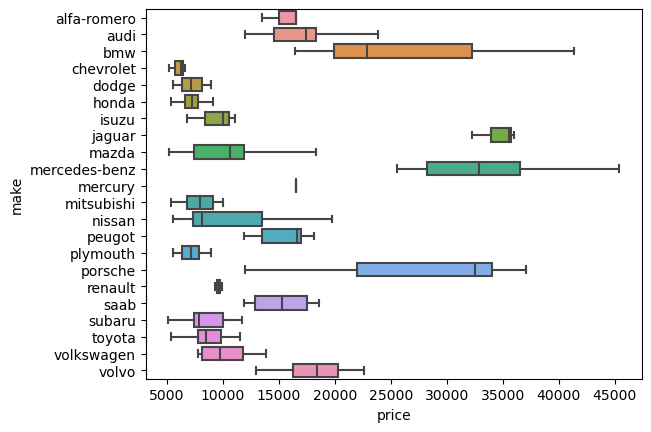

In [32]:
sns.boxplot(data=features,x=target,y="make")

In [33]:
features[(features["make"]=="mercury")]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
75,1,122.0,mercury,gas,hatchback,rwd,front,68.0,54.8,ohc,140,175.0,19,24


In [34]:
df[df["make"]=="mercury"].index

Int64Index([75], dtype='int64')

In [35]:
target.iloc[75]

9959

In [36]:
features.iloc[75,:]

symboling                     3
normalized-losses         153.0
make                 mitsubishi
fuel-type                   gas
body-style            hatchback
drive-wheels                fwd
engine-location           front
width                      65.4
height                     49.4
engine-type                 ohc
engine-size                 110
horsepower                116.0
city-mpg                     23
highway-mpg                  30
Name: 80, dtype: object

In [37]:
# Skewness removal

In [38]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  191 non-null    float64
 2   make               191 non-null    object 
 3   fuel-type          191 non-null    object 
 4   body-style         191 non-null    object 
 5   drive-wheels       191 non-null    object 
 6   engine-location    191 non-null    object 
 7   width              191 non-null    float64
 8   height             191 non-null    float64
 9   engine-type        191 non-null    object 
 10  engine-size        191 non-null    int64  
 11  horsepower         191 non-null    float64
 12  city-mpg           191 non-null    int64  
 13  highway-mpg        191 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 22.4+ KB


In [39]:
colname=features.select_dtypes(["float64","int64"]).columns

In [40]:
features[colname]

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,64.1,48.8,130,111.0,21,27
1,3,122.0,64.1,48.8,130,111.0,21,27
2,1,122.0,65.5,52.4,152,154.0,19,26
3,2,164.0,66.2,54.3,109,102.0,24,30
4,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28
201,-1,95.0,68.8,55.5,141,160.0,19,25
202,-1,95.0,68.9,55.5,173,134.0,18,23
203,-1,95.0,68.9,55.5,145,106.0,26,27


In [41]:
from scipy.stats import skew

In [42]:
skew(features["normalized-losses"])

0.8355271321292326

symboling
0.20852128897880182


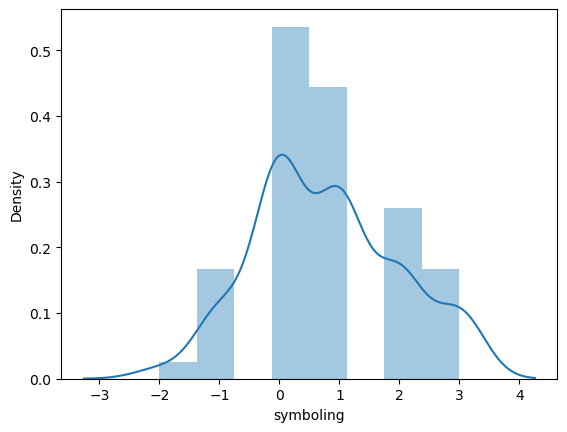

normalized-losses
0.8355271321292326


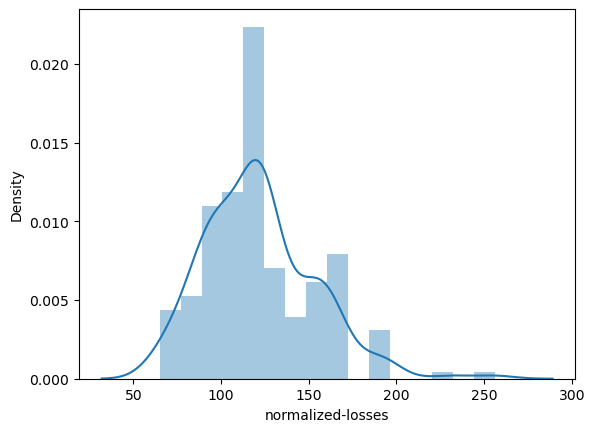

width
0.9233175535392493


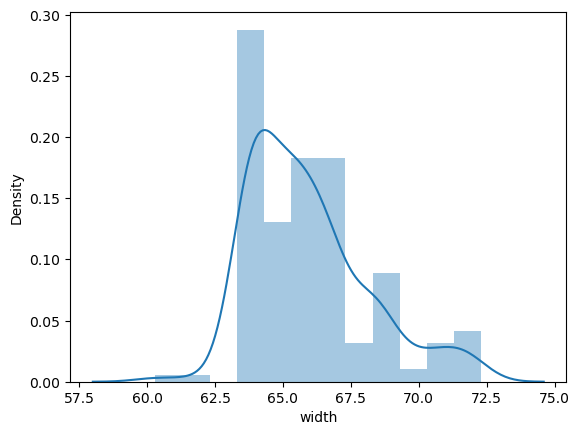

height
-0.00032469419681068097


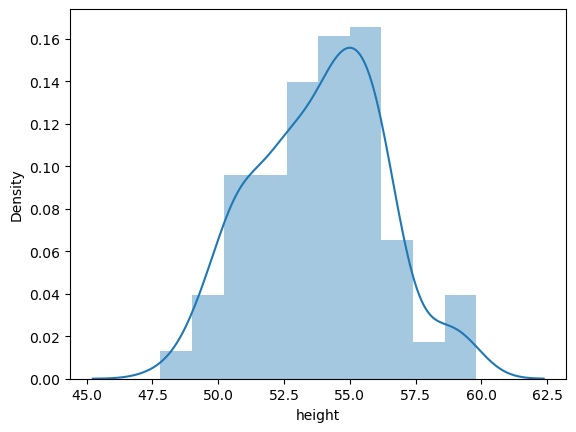

engine-size
2.049142065812302


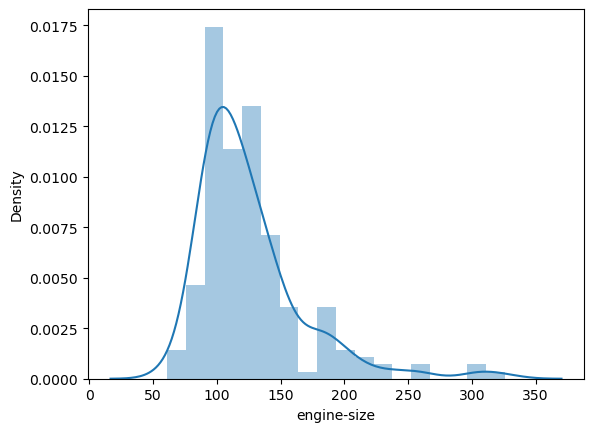

horsepower
1.5631842359574493


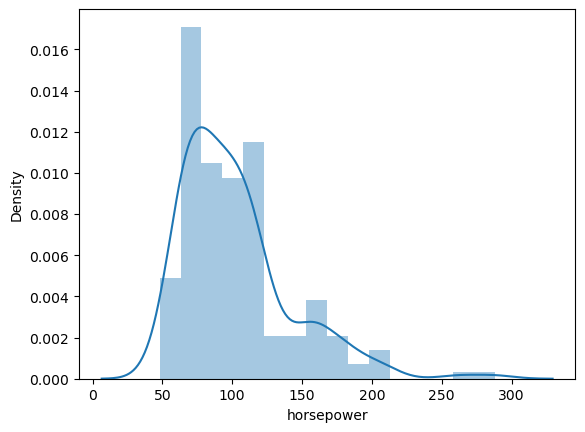

city-mpg
0.5923040642413773


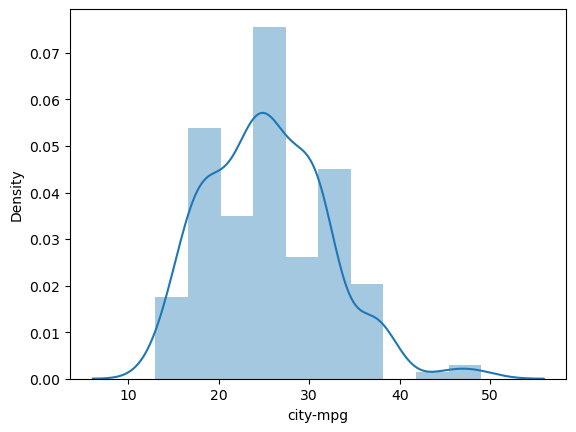

highway-mpg
0.47049709328895595


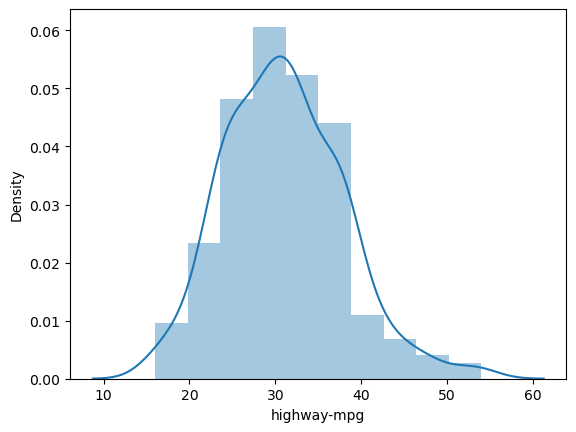

In [43]:
for col in features[colname]:
    print(col)
    print(skew(features[col]))
    
    plt.figure()
    sns.distplot(features[col])
    plt.show()
    

In [44]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.105790,0.071389,-0.035823,0.034606,-0.085781
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.110997,0.203434,-0.218749,-0.178221,0.133424
width,-0.232919,0.084195,1.000000,0.279210,0.735433,0.642195,-0.642704,-0.677218,0.718253
height,-0.541038,-0.370706,0.279210,1.000000,0.067149,-0.110137,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.110997,0.735433,0.067149,1.000000,0.810713,-0.653658,-0.677470,0.852995
horsepower,0.071389,0.203434,0.642195,-0.110137,0.810713,1.000000,-0.803162,-0.770903,0.746589
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.653658,-0.803162,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.677470,-0.770903,0.971337,1.000000,-0.679048
price,-0.085781,0.133424,0.718253,0.132444,0.852995,0.746589,-0.654611,-0.679048,1.000000


In [45]:
pd.concat([features,target],axis=1).corr()["price"].sort_values()
#h-m,w,hp,e-s-highly corr with target

highway-mpg         -0.707122
city-mpg            -0.682634
symboling           -0.097242
normalized-losses    0.127662
height               0.146146
width                0.732957
horsepower           0.771584
engine-size          0.870876
price                1.000000
Name: price, dtype: float64

In [46]:
features["normalized-losses"]=np.log(features["normalized-losses"])

In [47]:
skew(features["normalized-losses"])

0.0061510764084907665

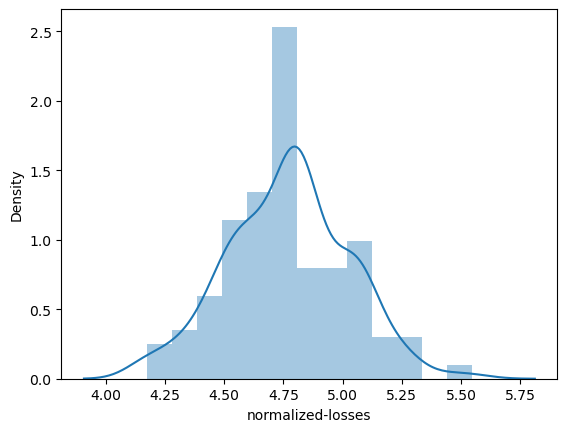

In [48]:
sns.distplot(features["normalized-losses"])
plt.show()

In [49]:
skew(np.sqrt(features["normalized-losses"]))

-0.07348447982136683

In [50]:
features["symboling"].value_counts()

 0    64
 1    53
 2    31
 3    20
-1    20
-2     3
Name: symboling, dtype: int64

In [51]:
np.sqrt(features["symboling"])

0      1.732051
1      1.732051
2      1.000000
3      1.414214
4      1.414214
         ...   
200         NaN
201         NaN
202         NaN
203         NaN
204         NaN
Name: symboling, Length: 191, dtype: float64

In [52]:
# Handling Categorical Values

In [53]:
colname=features.select_dtypes(["object"]).columns

In [54]:
colname

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [55]:
features["fuel-type"].value_counts()

gas       171
diesel     20
Name: fuel-type, dtype: int64

In [56]:
pd.get_dummies(features["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [57]:
pd.get_dummies(features["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
features["make"].nunique()

22

In [59]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(features[["make"]]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [60]:
#Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
le.fit_transform(features["make"])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21])

In [63]:
#le.fit_transform(features[["make","fuel-type"]])

In [64]:
#ordinal encoding

In [65]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [66]:
oe.fit_transform(features[["make","fuel-type"]])

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,

In [67]:
colname

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [68]:
features[colname]=oe.fit_transform(features[colname])

In [69]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  191 non-null    float64
 2   make               191 non-null    float64
 3   fuel-type          191 non-null    float64
 4   body-style         191 non-null    float64
 5   drive-wheels       191 non-null    float64
 6   engine-location    191 non-null    float64
 7   width              191 non-null    float64
 8   height             191 non-null    float64
 9   engine-type        191 non-null    float64
 10  engine-size        191 non-null    int64  
 11  horsepower         191 non-null    float64
 12  city-mpg           191 non-null    int64  
 13  highway-mpg        191 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 22.4 KB


In [70]:
#Data Scaling

In [71]:
a=np.array([1,2,3,4,5])
b=np.array([10,20,30,40,50])
c=np.array([100,200,300,400,500])

In [72]:
def minmax(arr):
    xnew=(arr-arr.min())/(arr.max()-arr.min())
    return xnew

In [73]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [74]:
minmax(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [75]:
minmax(c)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [76]:
def stddev(arr):
    xnew=(arr-arr.mean())/(arr.std())
    return xnew

In [77]:
stddev(a)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [78]:
stddev(b)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [79]:
stddev(c)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [80]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

In [81]:
mn.fit_transform(features.iloc[:,:])

array([[1.        , 0.45932177, 0.        , ..., 0.2625    , 0.22222222,
        0.28947368],
       [1.        , 0.45932177, 0.        , ..., 0.2625    , 0.22222222,
        0.28947368],
       [0.6       , 0.45932177, 0.        , ..., 0.44166667, 0.16666667,
        0.26315789],
       ...,
       [0.2       , 0.27684005, 1.        , ..., 0.35833333, 0.13888889,
        0.18421053],
       [0.2       , 0.27684005, 1.        , ..., 0.24166667, 0.36111111,
        0.28947368],
       [0.2       , 0.27684005, 1.        , ..., 0.275     , 0.16666667,
        0.23684211]])

In [82]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [83]:
features.iloc[:,:]=ss.fit_transform(features.iloc[:,:])

In [84]:
features.head(4)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405
1,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405
2,0.184009,0.137829,-1.945079,0.341993,-0.744365,1.219274,-0.126323,-0.186271,-0.596575,1.927419,0.625260,1.312895,-0.981219,-0.726376
3,1.020811,1.303434,-1.785837,0.341993,0.430625,-0.572121,-0.126323,0.133837,0.182752,-0.078777,-0.394450,-0.007780,-0.219378,-0.146490


In [85]:
# feature engineering

In [86]:
features["area"]=features["width"]*features["height"]

In [87]:
features.head(4)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
1,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
2,0.184009,0.137829,-1.945079,0.341993,-0.744365,1.219274,-0.126323,-0.186271,-0.596575,1.927419,0.625260,1.312895,-0.981219,-0.726376,0.111124
3,1.020811,1.303434,-1.785837,0.341993,0.430625,-0.572121,-0.126323,0.133837,0.182752,-0.078777,-0.394450,-0.007780,-0.219378,-0.146490,0.024459


In [88]:
features.drop(["width","height"],axis=1)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
1,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
2,0.184009,0.137829,-1.945079,0.341993,-0.744365,1.219274,-0.126323,1.927419,0.625260,1.312895,-0.981219,-0.726376,0.111124
3,1.020811,1.303434,-1.785837,0.341993,0.430625,-0.572121,-0.126323,-0.078777,-0.394450,-0.007780,-0.219378,-0.146490,0.024459
4,1.020811,1.303434,-1.785837,0.341993,0.430625,-2.363516,-0.126323,-0.078777,0.245833,0.322388,-1.133588,-1.306263,0.041173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.489596,-0.847717,1.398989,0.341993,0.430625,1.219274,-0.126323,-0.078777,0.364404,0.296991,-0.371747,-0.436433,0.923707
201,-1.489596,-0.847717,1.398989,0.341993,0.430625,1.219274,-0.126323,-0.078777,0.364404,1.465281,-0.981219,-0.871348,0.892842
202,-1.489596,-0.847717,1.398989,0.341993,0.430625,1.219274,-0.126323,1.927419,1.123258,0.804943,-1.133588,-1.161291,0.923707
203,-1.489596,-0.847717,1.398989,-2.924038,0.430625,1.219274,-0.126323,-0.078777,0.459261,0.093810,0.085358,-0.581405,0.923707


In [89]:
features.head(2)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467
1,1.857613,0.137829,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-0.826486,-2.073196,-3.088072,0.103548,0.220798,-0.676483,-0.581405,1.713467


In [90]:
#train test split

In [91]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [92]:
pet=["cat","dog","fish","turtle"]

In [93]:
a,b,c,d=pet

In [94]:
print(a,b,c,d)

cat dog fish turtle


In [95]:
xtrain.shape

(152, 15)

In [96]:
xtest.shape

(39, 15)

In [97]:
ytrain.shape

(152,)

In [98]:
ytest.shape

(39,)

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [100]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2_score=r2_score(ytest,ypred)
print(mse)
print(r2_score)

20170689.125690714
0.7061386063234942


In [101]:
train_accu= lr.score(xtrain,ytrain)
test_accu=lr.score(xtest,ytest)
print(train_accu)
print(test_accu)

0.8970083833725835
0.7061386063234942


In [ ]:
"""training accuracy is higher then testing accuracy 
that means low bias high variance therefore it is overfitting 
so we will apply regularssation to cost function 
or mse to reduce the over fitting 
we will be appling 

"""

In [102]:
lr.coef_

array([ 496.92746398, -386.04449746, -703.97749789, -324.64503513,
         15.55936799,  801.54744751, 1529.93145196, 1864.85089534,
        558.90338862, -258.02858007, 3689.12833247, 1150.21340836,
        -93.76713385, -390.19337683,  372.39146263])

In [103]:
from sklearn.linear_model import Ridge,Lasso

In [119]:
l2=Ridge(alpha=10)
l2.fit(xtrain,ytrain)
ypred=l2.predict(xtest)

In [120]:
mse=mean_squared_error(ytest,ypred)
print(mse)

train_accu1= l2.score(xtrain,ytrain)
test_accu1=l2.score(xtest,ytest)
print(train_accu1)
print(test_accu1)


20370760.392751478
0.8954507500028739
0.7032238213596917


In [122]:
for i in range (100,150):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    ypred=l2.predict(xtest)
    train_accu1= l2.score(xtrain,ytrain)
    test_accu1=l2.score(xtest,ytest)
    print(f"{i} Train accu:{train_accu1},Test accu:{test_accu1}")
   

100 Train accu:0.8594969712531502,Test accu:0.6902156777285045
101 Train accu:0.8590543034064511,Test accu:0.689992351232366
102 Train accu:0.8586112489826336,Test accu:0.6897680251541474
103 Train accu:0.8581678145564267,Test accu:0.6895427122672751
104 Train accu:0.8577240066093215,Test accu:0.6893164250697287
105 Train accu:0.8572798315331589,Test accu:0.6890891757938453
106 Train accu:0.8568352956335034,Test accu:0.688860976415722
107 Train accu:0.8563904051328194,Test accu:0.6886318386642309
108 Train accu:0.855945166173462,Test accu:0.6884017740296685
109 Train accu:0.8554995848204943,Test accu:0.6881707937720478
110 Train accu:0.855053667064343,Test accu:0.6879389089290555
111 Train accu:0.8546074188233022,Test accu:0.6877061303236829
112 Train accu:0.8541608459458936,Test accu:0.6874724685715454
113 Train accu:0.8537139542130965,Test accu:0.687237934087908
114 Train accu:0.85326674934045,Test accu:0.6870025370944213
115 Train accu:0.8528192369800409,Test accu:0.6867662876255879

In [131]:
for i in range (30,100):
    l2=Lasso(alpha=i)
    l2.fit(xtrain,ytrain)
    ypred=l2.predict(xtest)
    train_accu1= l2.score(xtrain,ytrain)
    test_accu1=l2.score(xtest,ytest)
    print(f"{i} Train accu:{train_accu1},Test accu:{test_accu1}")
   

30 Train accu:0.8967989685781546,Test accu:0.7063166913005834
31 Train accu:0.896784881534968,Test accu:0.706318841213476
32 Train accu:0.8967703325797507,Test accu:0.7063205748635695
33 Train accu:0.8967553252440924,Test accu:0.7063217239317113
34 Train accu:0.8967398558022239,Test accu:0.7063224829779013
35 Train accu:0.8967239242541453,Test accu:0.7063228520021391
36 Train accu:0.8967075306021296,Test accu:0.7063228309045032
37 Train accu:0.8966906748566404,Test accu:0.7063224192481353
38 Train accu:0.8966733569124641,Test accu:0.7063216214319696
39 Train accu:0.8966555767615078,Test accu:0.7063204374493905
40 Train accu:0.8966373339044541,Test accu:0.7063188864817465
41 Train accu:0.8966186266779531,Test accu:0.7063170298102138
42 Train accu:0.8965994571757517,Test accu:0.7063147832703432
43 Train accu:0.8965798253989677,Test accu:0.7063121468184876
44 Train accu:0.8965597313476009,Test accu:0.7063091204546474
45 Train accu:0.8965391750216514,Test accu:0.7063057041788221
46 Train a

In [132]:
# KNN

In [133]:

# 29=5.38
# 1
# 1
# 3.6
# 2

"""
regression is supervise learning technique where target is continuous 
and numeric and regression line helps in future predictions
where as in catagorical callsification we have 2 or more classes
the line to differentiat classes is known as hyper plan
or decision boundry 
the k nearest noubor model is availabe for both classification and regressu=ion problems 

"""

'\nregression is supervise learning technique where target is continuous \nand numeric and regression line helps in future predictions\nwhere as in catagorical callsification we have 2 or more classes\nthe line to differentiat classes is known as hyper plan\nor decision boundry \nthe k nearest noubor model is availabe for both classification and regressu=ion problems \n\n'